## Bootstapping + Aggregation

### Bootstrapping : Drawing a sample out from a population randomly (Sampling)
### Aggregation : Majority count of output from each model

# Bagging : 
> All underlying models should be same. But the subset of data provided to each model will be different. We then train each base model on the subset of data.

Bagging, short for bootstrap aggregating, is a machine learning ensemble method designed to
improve the stability and accuracy of machine learning algorithms used in statistical
classification and regression. It also helps to avoid overfitting. The key principle of bagging is to
generate multiple subsets of the original data (with replacement), train a separate model for
each subset, and then combine the results.

#### NOTE:

Base Models Should always be used with Low Bias High varaince model(eg: Decision Tree, SVM, KNN) to get Low Bias Low Variance results. 

___(Models most likely to overfit on training data)___

#### In Machine Learning we neeed :

### <span class="mark">Low Bias- Low variance Model.</span>

##### Bias: Inability of a model to fit in it's training data. Bad results on training data. ---> High Bias.

##### Variance:  Model inability to perfrom on testing data. ---> High Variance

### NOTE: Bias and Variance are negatively correlated.

____

Most of the ML models are either Low Bias-High variance or High Bias-Low variance. But then how Bagging give Low Bias-Low variance

### How Bagging reduces variance?

- We select base models with __low bias and High Variance__ and base models will be same


- It creates different subset of data and send to all the models. Not a single base model will get all the noisy points. That is the noisy points will get distributed between all the base models.


- Hence variance will be distributed. Thus the variance will reduce as a whole. So, resultant will have low variance. If we make changes in data still there will no significant change in the output of the model.


- So because of bagging we will get a model with **Low Bias Low varaince**


Bagging in not only restriceted to Decision trees. It can work well on KNN and SVM too. i.e models with Low Bias and High Variance base models.

___
___

#### Bagging on Iris dataset

In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [95]:
df = pd.read_csv(r'iris.csv')
df.head()

,Unnamed: 0,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,0,5.1,3.5,1.4,0.2,0
1,1,4.9,3.0,1.4,0.2,0
2,2,4.7,3.2,1.3,0.2,0
3,3,4.6,3.1,1.5,0.2,0
4,4,5.0,3.6,1.4,0.2,0


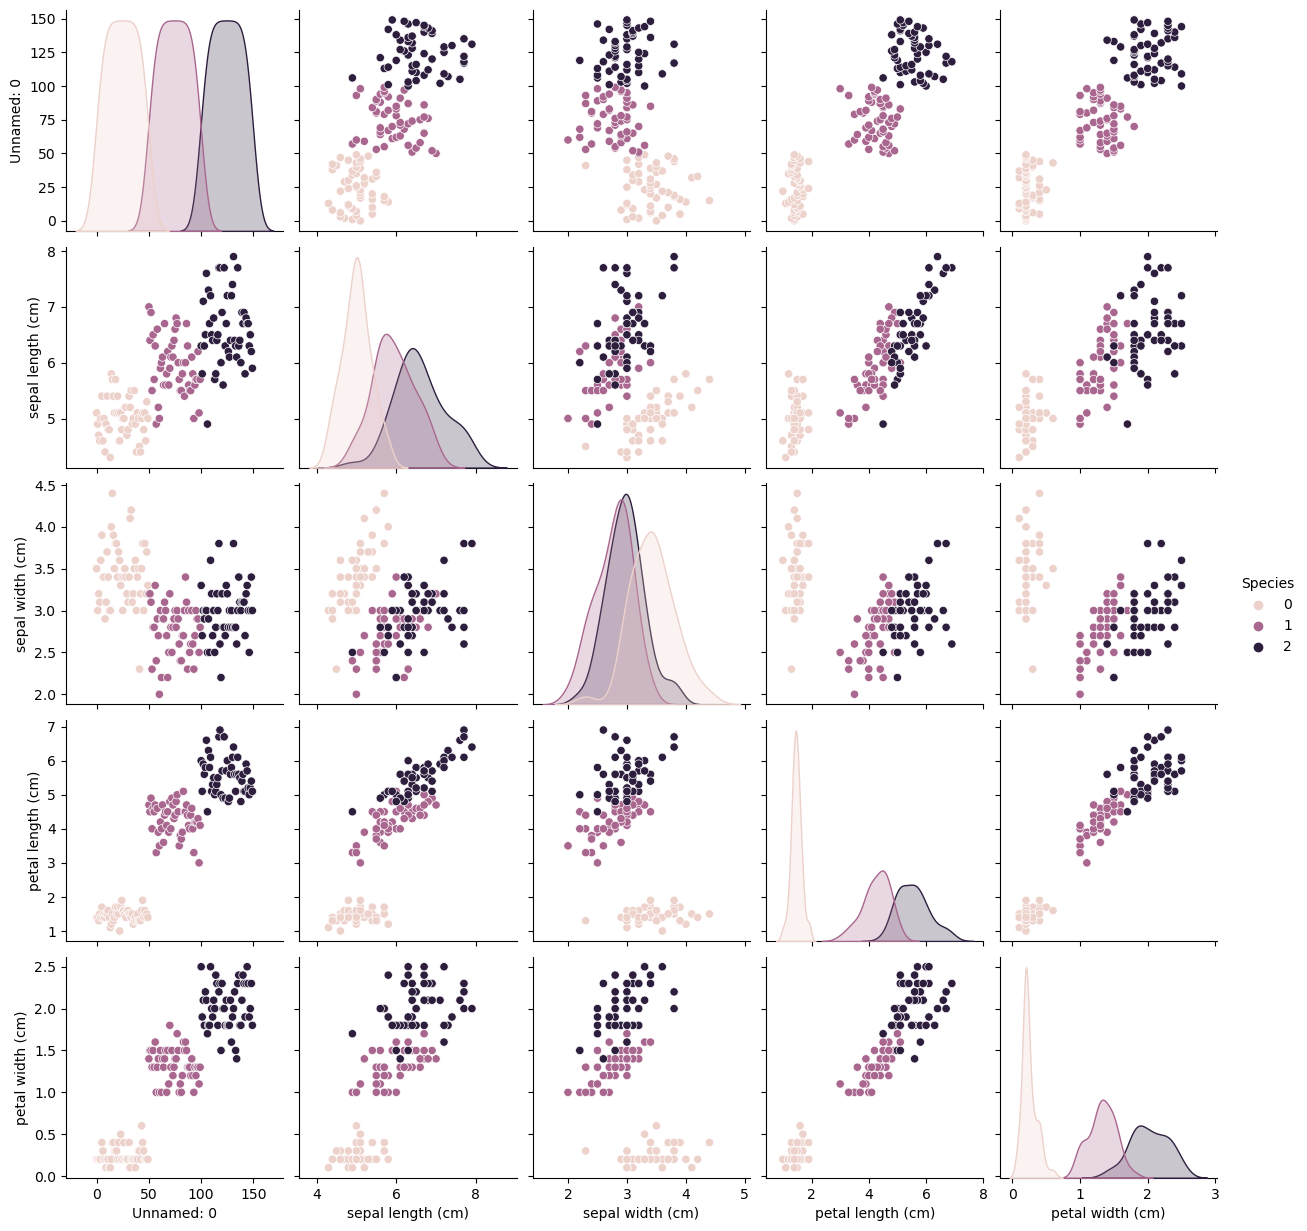

In [96]:
import seaborn as sns
sns.pairplot(df,hue='Species')

In [97]:
# to make classification task difficult we will take only 2 columns i.e Sepal_width and petal_length

new_df = df[df['Species']!=0][['sepal width (cm)','petal length (cm)','Species']]
new_df.head()

,sepal width (cm),petal length (cm),Species
50,3.2,4.7,1
51,3.2,4.5,1
52,3.1,4.9,1
53,2.3,4.0,1
54,2.8,4.6,1


In [98]:
new_df.shape

(100, 3)

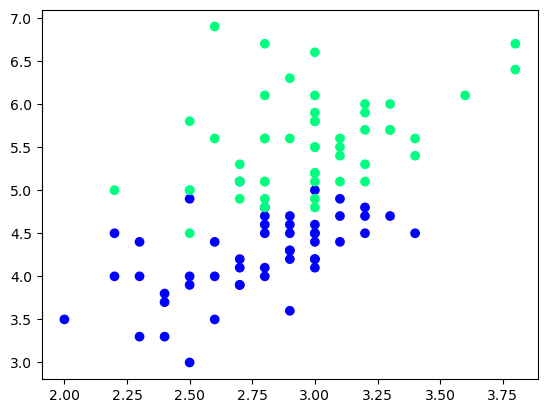

In [99]:
plt.scatter(new_df['sepal width (cm)'],new_df['petal length (cm)'],c=new_df['Species'],cmap='winter')

In [100]:
#shuffling the rows

df = new_df.sample(100) 

In [101]:
df.head()

,sepal width (cm),petal length (cm),Species
82,2.7,3.9,1
114,2.8,5.1,2
139,3.1,5.4,2
67,2.7,4.1,1
109,3.6,6.1,2


In [102]:
# Taking only 10 rows for training
df_train = df.iloc[:60,:].sample(10) # 10 random rows from first 60 rows
df_val = df.iloc[60:80,:].sample(5) # from 60-80 row number, selecting 5 random rows for testing and calculating accuracy
df_test = df.iloc[80:,:].sample(5)

In [103]:
df_train

# all uniques rows

,sepal width (cm),petal length (cm),Species
141,3.1,5.1,2
80,2.4,3.8,1
104,3.0,5.8,2
79,2.6,3.5,1
143,3.2,5.9,2
129,3.0,5.8,2
82,2.7,3.9,1
118,2.6,6.9,2
75,3.0,4.4,1
96,2.9,4.2,1


In [104]:
df_val

# unique values

,sepal width (cm),petal length (cm),Species
134,2.6,5.6,2
77,3.0,5.0,1
97,2.9,4.3,1
112,3.0,5.5,2
107,2.9,6.3,2


In [105]:
df_test

# unique values

,sepal width (cm),petal length (cm),Species
59,2.7,3.9,1
138,3.0,4.8,2
95,3.0,4.2,1
140,3.1,5.6,2
119,2.2,5.0,2


In [106]:
X_test = df_val.iloc[:,:2].values
y_test = df_val.iloc[:,-1].values

In [107]:
X_test

array([[2.6, 5.6],
       [3. , 5. ],
       [2.9, 4.3],
       [3. , 5.5],
       [2.9, 6.3]])

In [108]:
y_test

array([2, 1, 1, 2, 2], dtype=int64)

## Case 1: Bagging

Training 3 base models here will be Decision Trees.

All trees will have 80% of data

In [153]:
# Data for Tree 1

df_bag = df_train.sample(8,replace = True) # sampling with replacement i.e same row can come multiple times

X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

df_bag

,sepal width (cm),petal length (cm),Species
80,2.4,3.8,1
143,3.2,5.9,2
143,3.2,5.9,2
141,3.1,5.1,2
141,3.1,5.1,2
118,2.6,6.9,2
141,3.1,5.1,2
141,3.1,5.1,2


In [154]:
X

,sepal width (cm),petal length (cm)
80,2.4,3.8
143,3.2,5.9
143,3.2,5.9
141,3.1,5.1
141,3.1,5.1
118,2.6,6.9
141,3.1,5.1
141,3.1,5.1


In [155]:
y

80     1
143    2
143    2
141    2
141    2
118    2
141    2
141    2
Name: Species, dtype: int64

In [156]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score

In [157]:
from mlxtend.plotting import plot_decision_regions

In [158]:
dt_bag1 = DecisionTreeClassifier()

In [165]:
def evaluate(clf,X,y): # decision_tree, training_data
    clf.fit(X.values,y)       # training the train_data 
    plot_tree(clf)     # plotting the decision_tree
    plt.show()
    plot_decision_regions(X.values, y.values, clf=clf, legend=2)  #plotting decision regions
    y_pred=clf.predict(X_test)    #plotting accuracy using X_test and y_test
    
    return ("accuracy score:",accuracy_score(y_test,y_pred)) 
    

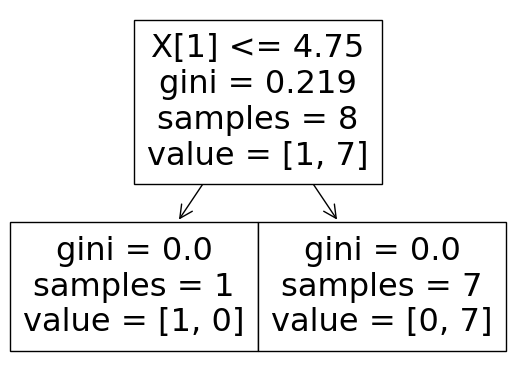

('accuracy score:', 0.8)

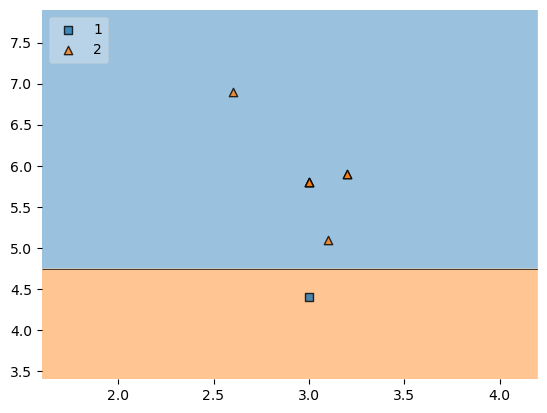

In [166]:
evaluate(dt_bag1,X,y)

In [167]:
# Data for Tree 2
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

,sepal width (cm),petal length (cm),Species
129,3.0,5.8,2
96,2.9,4.2,1
79,2.6,3.5,1
143,3.2,5.9,2
143,3.2,5.9,2
129,3.0,5.8,2
82,2.7,3.9,1
129,3.0,5.8,2


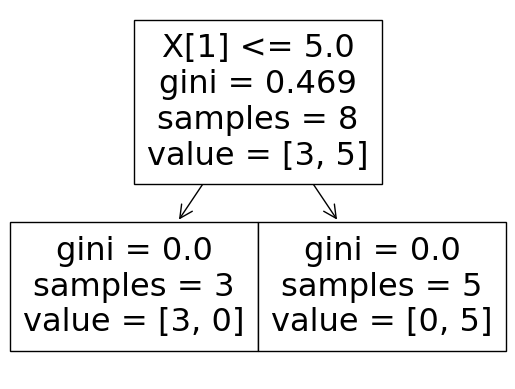

('accuracy score:', 1.0)

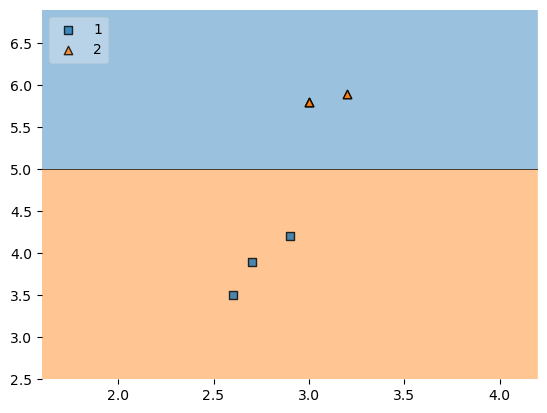

In [168]:
dt_bag2 = DecisionTreeClassifier()
evaluate(dt_bag2,X,y)

80% accuracy

In [169]:
# Data for Tree 3
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

,sepal width (cm),petal length (cm),Species
82,2.7,3.9,1
118,2.6,6.9,2
96,2.9,4.2,1
96,2.9,4.2,1
141,3.1,5.1,2
96,2.9,4.2,1
82,2.7,3.9,1
129,3.0,5.8,2


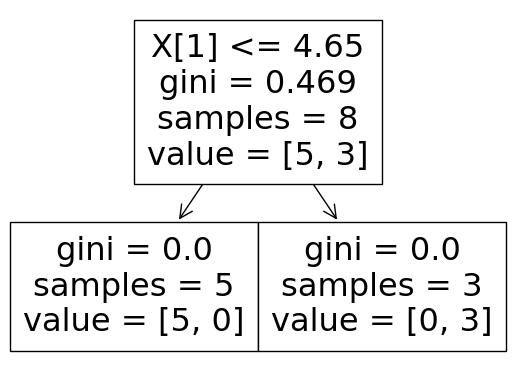

('accuracy score:', 0.8)

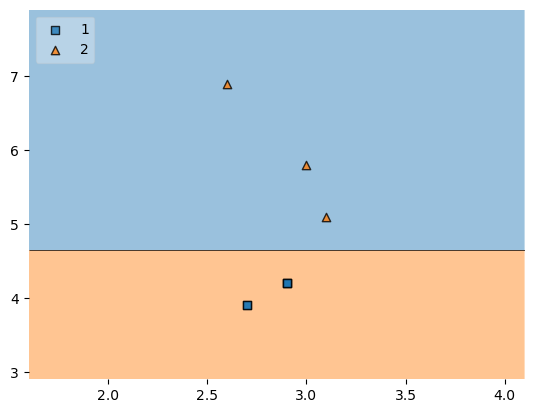

In [170]:
dt_bag3 = DecisionTreeClassifier()
evaluate(dt_bag3,X,y)

Accuracy 80%

### Predict

In [171]:
df_test

,sepal width (cm),petal length (cm),Species
59,2.7,3.9,1
138,3.0,4.8,2
95,3.0,4.2,1
140,3.1,5.6,2
119,2.2,5.0,2


In [172]:
np.array([3.1,4.7])

array([3.1, 4.7])

In [173]:
np.array([3.1,4.7]).shape

(2,)

In [174]:
np.array([3.1,4.7]).ndim

1

In [175]:
np.array([3.1,4.7]).reshape(1,2)

array([[3.1, 4.7]])

In [176]:
# changing shape of array for prediction
np.array([3.1,4.7]).reshape(1,2).shape

(1, 2)

In [177]:
# changing the dimension
np.array([3.1,4.7]).reshape(1,2).ndim

2

In [178]:
# running same row of test on all 3 models
print("Predictor 1",dt_bag1.predict(np.array([3.1,4.7]).reshape(1,2)))
print("Predictor 2",dt_bag2.predict(np.array([3.1,4.7]).reshape(1,2)))
print("Predictor 3",dt_bag3.predict(np.array([3.1,4.7]).reshape(1,2)))

Predictor 1 [1]
Predictor 2 [1]
Predictor 3 [2]


#### Majority says category will be 1 and actual output is also 1.

___
___


## <span class="girk">Types of Bagging :</span> 
### Depends on what type of data subsets we are creating

- **Bagging** - we do row sampling with replacement. ie. <span class="pirk">bootstrap : True</span>


- **Pasting** - we do row sampling but without replacement


- **Random subspaces** - We ***don't*** do row sampling, we do column sampling with and without replacement


- **Random Patches** -  we do both row sampling and column sampling</div><i class="fa fa-lightbulb-o "></i>

### Pasting

In [38]:
# Row sampling without replacement
df_train

,sepal width (cm),petal length (cm),Species
70,3.2,4.8,1
102,3.0,5.9,2
120,3.2,5.7,2
92,2.6,4.0,1
67,2.7,4.1,1
87,2.3,4.4,1
103,2.9,5.6,2
75,3.0,4.4,1
138,3.0,4.8,2
149,3.0,5.1,2


In [39]:
df_train.sample(8) 

# no rows will be repeating as replace = False as default

,sepal width (cm),petal length (cm),Species
103,2.9,5.6,2
67,2.7,4.1,1
120,3.2,5.7,2
87,2.3,4.4,1
70,3.2,4.8,1
149,3.0,5.1,2
75,3.0,4.4,1
102,3.0,5.9,2


### Bagging  vs  Pasting 

In Bagging we do row sampling with replacement but in Pasting we do row sampling without replacement.

### Random Subspaces

<span class="mark">We don't do row sampling, we do column sampling</span>

With and without replacement both works

In [40]:
df = pd.read_csv(r'iris.csv').iloc[:,1:]
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [41]:
df1 = df.sample(2,replace=True,axis=1) # randomly selecting 2 columns
df1 

# each time we do it, we get at random different columns
# as replace is True, we can get 2 same columns

,Species,petal width (cm)
0,0,0.2
1,0,0.2
2,0,0.2
3,0,0.2
4,0,0.2
...,...,...
145,2,2.3
146,2,1.9
147,2,2.0
148,2,2.3


### Random Patches

we do both row sampling and column sampling

In [42]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [43]:
df1 = df.sample(8,replace=True).sample(2,replace=True,axis=1)
df1

,sepal width (cm),Species
107,2.9,2
98,2.5,1
8,2.9,0
47,3.2,0
117,3.8,2
65,3.1,1
13,3.0,0
132,2.8,2


___

# Bagging Classifiers - Models

In [181]:
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [182]:
X,y = make_classification(n_samples=10000, n_features=10, n_informative=3) # columns = 10, 

In [188]:
X

array([[ 0.11130938,  0.29966618,  1.4737139 , ...,  0.28928235,
         0.92975707,  1.20448779],
       [-2.22907156,  1.81163511,  1.13527798, ..., -1.69643175,
        -2.11657606,  0.35522016],
       [ 3.5307953 , -3.49071879,  1.03316939, ...,  0.13834492,
        -0.55311674,  2.91654467],
       ...,
       [ 1.02635558, -0.46251774, -2.30966591, ...,  2.34525325,
        -0.62624394, -2.34084308],
       [-1.15916428,  0.03633011, -0.7076505 , ..., -2.3087603 ,
         0.09474864, -0.33054345],
       [ 0.06262689, -0.17343104,  0.97711714, ..., -0.64522582,
        -1.03960467,  1.1402583 ]])

In [189]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)

# train dataset will have 7500 rows

In [190]:
X_train.shape

(7500, 10)

In [186]:
X_train

array([[-0.46266787,  1.74051136,  1.04275671, ...,  2.28154245,
        -1.60680164, -0.3325879 ],
       [-0.60842005,  0.37750544,  0.91274491, ..., -0.97242604,
         0.68496447,  0.82390218],
       [-0.53376699,  0.43477872,  2.08825977, ..., -1.1706216 ,
        -1.21118998,  1.95476734],
       ...,
       [-1.06936031, -0.66075285,  0.38347903, ..., -4.08054609,
        -0.29290683,  1.39194035],
       [-0.1047608 ,  1.01320487,  1.30693351, ...,  1.41422327,
        -0.50884385,  0.4659651 ],
       [-0.48773552,  1.27906111,  0.08420384, ...,  1.62209607,
        -0.03454099, -0.89189902]])

###### single Decision Tree

In [192]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
accuracy_singledcisiontree = accuracy_score(y_test,y_pred)

print("Accuracy of single Decision Tree is",(accuracy_score(y_test,y_pred))*100,"%")

Accuracy of single Decision Tree is 88.96 %


## Bagging for Multiple Decision Tree

In [193]:
bag = BaggingClassifier(
    base_estimator = DecisionTreeClassifier(), # type of base model
    n_estimators=500, # total number of base models
    max_samples=0.25, # giving 2000 rows to each model in bagging
    bootstrap=True, # sampling With replacement
    random_state=42
)

In [194]:
bag.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=0.25,
                  n_estimators=500, random_state=42)

In [195]:
bag.get_params()

{'base_estimator__ccp_alpha': 0.0,
 'base_estimator__class_weight': None,
 'base_estimator__criterion': 'gini',
 'base_estimator__max_depth': None,
 'base_estimator__max_features': None,
 'base_estimator__max_leaf_nodes': None,
 'base_estimator__min_impurity_decrease': 0.0,
 'base_estimator__min_samples_leaf': 1,
 'base_estimator__min_samples_split': 2,
 'base_estimator__min_weight_fraction_leaf': 0.0,
 'base_estimator__random_state': None,
 'base_estimator__splitter': 'best',
 'base_estimator': DecisionTreeClassifier(),
 'bootstrap': True,
 'bootstrap_features': False,
 'max_features': 1.0,
 'max_samples': 0.25,
 'n_estimators': 500,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [196]:
y_pred = bag.predict(X_test)
accuracy_baggingDecisionTree = accuracy_score(y_test,y_pred)
print("Bagging using Decision Tree is", accuracy_score(y_test,y_pred))

Bagging using Decision Tree is 0.916


In [197]:
bag.estimators_samples_[0].shape # base model got 1875 rows

(1875,)

In [198]:
bag.estimators_features_[0].shape # base model got all 10 columns as we are not doing column sampling

(10,)

#### Bagging using multiple SVM

In [216]:
bag = BaggingClassifier(
    base_estimator=SVC(),
    n_estimators=100,
    max_samples=0.25,
    bootstrap=True,
    random_state=42,
    n_jobs=-1
)

In [217]:
bag.fit(X_train,y_train)
y_pred = bag.predict(X_test)
accuracy_baggingSVM = accuracy_score(y_test,y_pred)
print("Accuracy of Bagging using SVM is", "%.2f"%(accuracy_baggingSVM*100),"%")

Accuracy of Bagging using SVM is 91.08 %


In [218]:
bag.get_params()

{'base_estimator__C': 1.0,
 'base_estimator__break_ties': False,
 'base_estimator__cache_size': 200,
 'base_estimator__class_weight': None,
 'base_estimator__coef0': 0.0,
 'base_estimator__decision_function_shape': 'ovr',
 'base_estimator__degree': 3,
 'base_estimator__gamma': 'scale',
 'base_estimator__kernel': 'rbf',
 'base_estimator__max_iter': -1,
 'base_estimator__probability': False,
 'base_estimator__random_state': None,
 'base_estimator__shrinking': True,
 'base_estimator__tol': 0.001,
 'base_estimator__verbose': False,
 'base_estimator': SVC(),
 'bootstrap': True,
 'bootstrap_features': False,
 'max_features': 1.0,
 'max_samples': 0.25,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [219]:
bag.estimators_samples_[0].shape # base model got 2000 rows

(1875,)

In [220]:
bag.estimators_features_[0].shape # base model got all 10 columns as we are not doing column sampling

(10,)

## Pasting for multiple Decision tree

In [238]:
bag = BaggingClassifier(
    base_estimator= DecisionTreeClassifier(),
    n_estimators=500,
    max_samples= 0.25,
    bootstrap=False, #sampling without sampling
    random_state=42,
    n_jobs=-1
)

In [239]:
bag.fit(X_train,y_train)
y_pred = bag.predict(X_test)
accuracy_pastingclassifier = accuracy_score(y_test,y_pred)
print("Accuracy of Pasting Classifier is",(accuracy_pastingclassifier*100),'%')

Accuracy of Pasting Classifier is 91.8 %


In [240]:
bag.get_params()

{'base_estimator__ccp_alpha': 0.0,
 'base_estimator__class_weight': None,
 'base_estimator__criterion': 'gini',
 'base_estimator__max_depth': None,
 'base_estimator__max_features': None,
 'base_estimator__max_leaf_nodes': None,
 'base_estimator__min_impurity_decrease': 0.0,
 'base_estimator__min_samples_leaf': 1,
 'base_estimator__min_samples_split': 2,
 'base_estimator__min_weight_fraction_leaf': 0.0,
 'base_estimator__random_state': None,
 'base_estimator__splitter': 'best',
 'base_estimator': DecisionTreeClassifier(),
 'bootstrap': False,
 'bootstrap_features': False,
 'max_features': 1.0,
 'max_samples': 0.25,
 'n_estimators': 500,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [241]:
bag.estimators_samples_[0].shape

(1875,)

In [242]:
bag.estimators_features_[0].shape 

(10,)

## Random Subspaces

In [243]:
bag = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(),
    n_estimators=500, # total number of base model
    max_samples=1.0, # as we only do column sampling and take all the rows
    bootstrap=False,
    max_features=0.5, # column sampling
    bootstrap_features=True, # column sampling with repitition
    random_state=42,n_jobs=-1
)

In [244]:
bag.fit(X_train,y_train)
y_pred = bag.predict(X_test)
accuracy_randomsubspaces = accuracy_score(y_test,y_pred)
print("Accuracy of Random Subspace is",accuracy_score(y_test,y_pred))

Accuracy of Random Subspace is 0.9152


In [245]:
bag.get_params()

{'base_estimator__ccp_alpha': 0.0,
 'base_estimator__class_weight': None,
 'base_estimator__criterion': 'gini',
 'base_estimator__max_depth': None,
 'base_estimator__max_features': None,
 'base_estimator__max_leaf_nodes': None,
 'base_estimator__min_impurity_decrease': 0.0,
 'base_estimator__min_samples_leaf': 1,
 'base_estimator__min_samples_split': 2,
 'base_estimator__min_weight_fraction_leaf': 0.0,
 'base_estimator__random_state': None,
 'base_estimator__splitter': 'best',
 'base_estimator': DecisionTreeClassifier(),
 'bootstrap': False,
 'bootstrap_features': True,
 'max_features': 0.5,
 'max_samples': 1.0,
 'n_estimators': 500,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [246]:
bag.estimators_samples_[0].shape # all the rows ie. 7500 has been used

(7500,)

In [247]:
bag.estimators_features_[0].shape # total columns used with column sampling is 5 out of 10 columns

(5,)

### Random Patches

In [248]:
bag = BaggingClassifier(
    base_estimator = DecisionTreeClassifier(),
    n_estimators=500,         # totals number of base models
    max_samples=0.25,         # total number of rows
    bootstrap=True,           # row sampling with repition
    max_features=0.5,         # column sampling
    bootstrap_features=True,  # column sampling repition 
    random_state=42,
    n_jobs=-1
)

In [249]:
bag.fit(X_train,y_train)
y_pred = bag.predict(X_test)
accuracy_randompatches = accuracy_score(y_test,y_pred)
print("Random Patches classifier",accuracy_score(y_test,y_pred))

Random Patches classifier 0.9028


In [250]:
bag.get_params()

{'base_estimator__ccp_alpha': 0.0,
 'base_estimator__class_weight': None,
 'base_estimator__criterion': 'gini',
 'base_estimator__max_depth': None,
 'base_estimator__max_features': None,
 'base_estimator__max_leaf_nodes': None,
 'base_estimator__min_impurity_decrease': 0.0,
 'base_estimator__min_samples_leaf': 1,
 'base_estimator__min_samples_split': 2,
 'base_estimator__min_weight_fraction_leaf': 0.0,
 'base_estimator__random_state': None,
 'base_estimator__splitter': 'best',
 'base_estimator': DecisionTreeClassifier(),
 'bootstrap': True,
 'bootstrap_features': True,
 'max_features': 0.5,
 'max_samples': 0.25,
 'n_estimators': 500,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

#### Number of rows being used:

In [251]:
bag.estimators_samples_[0].shape

(1875,)

#### Number of columns being used:

In [252]:
bag.estimators_features_[0].shape

(5,)

***

### OOB Score (Out of Bag samples)

When we do row sampling, since we are doing it with replacement so there is a chance that there will be some rows which will not be given to any base model. And there may be some rows which are repeating in all the base models.

So statistically there will be only 63% rows used for base models and rest 37% will never be used in any base models. So our Bagging classifiers have not even seen these 37% data during training.


As we have never seen these rows, we can use these rows to check the performance of the model. We can try finding accuracy on this unseen data.

In [253]:
bag = BaggingClassifier(
    base_estimator= DecisionTreeClassifier(),
    n_estimators= 500,
    max_samples= 0.25,
    bootstrap=True,
    oob_score= True, # this will be True for using OOB
    random_state=42,
    n_jobs=-1
)

In [254]:
bag.fit(X_train,y_train)
y_pred = bag.predict(X_test)
accuracy_oobscore = bag.oob_score_
print("OOB",accuracy_score(y_test,y_pred))
print("OOB score",bag.oob_score_),bag.estimators_samples_[0].shape

bag.estimators_features_[0].shape

OOB 0.916
OOB score 0.9252


(10,)

In [255]:
bag.estimators_samples_[0].shape

(1875,)

In [256]:
bag.estimators_features_[0].shape

(10,)

In [257]:
bag.get_params()

{'base_estimator__ccp_alpha': 0.0,
 'base_estimator__class_weight': None,
 'base_estimator__criterion': 'gini',
 'base_estimator__max_depth': None,
 'base_estimator__max_features': None,
 'base_estimator__max_leaf_nodes': None,
 'base_estimator__min_impurity_decrease': 0.0,
 'base_estimator__min_samples_leaf': 1,
 'base_estimator__min_samples_split': 2,
 'base_estimator__min_weight_fraction_leaf': 0.0,
 'base_estimator__random_state': None,
 'base_estimator__splitter': 'best',
 'base_estimator': DecisionTreeClassifier(),
 'bootstrap': True,
 'bootstrap_features': False,
 'max_features': 1.0,
 'max_samples': 0.25,
 'n_estimators': 500,
 'n_jobs': -1,
 'oob_score': True,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

# Bagging Tips

- Bagging generally gives better results than Pasting
- Good results come around the 25% to 50% row sampling mark
- Random patches and subspaces should be used while dealing with high dimensional data
- To find the correct hyperparameter values we can do GridSearchCV/RandomSearchCV

***

# Applying GridSearchCV

In [80]:
from sklearn.model_selection import GridSearchCV

#### note: running will take tooooooooo much time :25 mins

In [293]:
bag = BaggingClassifier(
    base_estimator= DecisionTreeClassifier(),
    n_estimators= 400,
    max_samples= 0.75,
    bootstrap=True,
    max_features=0.8,
    oob_score= True, # this will be True for using OOB
    random_state=42,
    n_jobs=-1
)

In [294]:
bag.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_features=0.8,
                  max_samples=0.75, n_estimators=400, n_jobs=-1, oob_score=True,
                  random_state=42)

In [295]:
bag.fit(X_train,y_train)
y_pred = bag.predict(X_test)
print("accuracy of bagging classifier",accuracy_score(y_test,y_pred))
accuracy_oobscore = bag.oob_score_
print('OOB score:',accuracy_oobscore)

bag.estimators_features_[0].shape

accuracy of bagging classifier 0.9252
OOB score: 0.9297333333333333


(8,)

### Results

In [302]:
print("Accuracy of Single Decision Tree is ",accuracy_singledcisiontree*100)
print("Accuracy of Bagging using Decision Tree is ",accuracy_baggingDecisionTree*100)
print("Accuracy of Bagging using SVM is ",accuracy_baggingSVM*100)
print("Accuracy of Pasting Classifier using Decision Tree is ",accuracy_pastingclassifier*100)
print("Accuracy of Random Patches using Decision Tree is ",accuracy_randompatches*100)
print("Accuracy of OOB using Decision Tree is ",accuracy_oobscore*100)

Accuracy of Single Decision Tree is  88.96
Accuracy of Bagging using Decision Tree is  91.60000000000001
Accuracy of Bagging using SVM is  91.08000000000001
Accuracy of Pasting Classifier using Decision Tree is  91.8
Accuracy of Random Patches using Decision Tree is  90.28
Accuracy of OOB using Decision Tree is  92.97333333333333


***

# Bagging Regressor - Models

Since it is a Regression model so output will be numerical. So when we do aggregation of all models together, we will use ***Mean.***

In [303]:
from sklearn import datasets

boston = datasets.load_boston()
X_boston, Y_boston = boston.data, boston.target
print('Dataset features names : '+str(boston.feature_names))
print('Dataset features size : '+str(boston.data.shape))
print('Dataset target size : '+str(boston.target.shape))

Dataset features names : ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
Dataset features size : (506, 13)
Dataset target size : (506,)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

In [304]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [305]:
X_train, X_test, Y_train, Y_test = train_test_split(X_boston, Y_boston, test_size=0.25, random_state = 123)

In [306]:
print('Train sets size : ', X_train.shape,  Y_train.shape)
print('\n Test sets size : ', X_test.shape, Y_test.shape)

Train sets size :  (379, 13) (379,)

 Test sets size :  (127, 13) (127,)


#### Normal Regression models:

In [307]:
lr = LinearRegression()
dt = DecisionTreeRegressor()
knn = KNeighborsRegressor()

In [308]:
lr.fit(X_train,Y_train)
dt.fit(X_train,Y_train)
knn.fit(X_train,Y_train)

KNeighborsRegressor()

In [309]:
lr.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [310]:
dt.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [311]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [312]:
y_pred1 = lr.predict(X_test)
y_pred2 = dt.predict(X_test)
y_pred3 = knn.predict(X_test)

In [313]:
print("R^2 score for LR",r2_score(Y_test,y_pred1))
print("R^2 score for DT",r2_score(Y_test,y_pred2))
print("R^2 score for KNN",r2_score(Y_test,y_pred3))

R^2 score for LR 0.6862448857295773
R^2 score for DT 0.46029610966299883
R^2 score for KNN 0.4848255965697358


#### Bagging Regressor Model

In [314]:
from sklearn.ensemble import BaggingRegressor

bag_regressor = BaggingRegressor(random_state=1)
bag_regressor.fit(X_train, Y_train)

BaggingRegressor(random_state=1)

In [315]:
Y_preds = bag_regressor.predict(X_test)

print('Training Coefficient of R^2 : %.3f'%bag_regressor.score(X_train, Y_train))
print('Test Coefficient of R^2 : %.3f'%bag_regressor.score(X_test, Y_test))

Training Coefficient of R^2 : 0.975
Test Coefficient of R^2 : 0.803


In [324]:
%%time

n_samples = boston.data.shape[0]
n_features = boston.data.shape[1]

params = {'base_estimator': [None, LinearRegression(), KNeighborsRegressor()],
          'n_estimators': [20,50,100],
          'max_samples': [0.5,1.0],
          'max_features': [0.5,1.0],
          'bootstrap': [True, False],
          'bootstrap_features': [True, False]}

bagging_regressor_grid = GridSearchCV(BaggingRegressor(random_state=1, n_jobs=-1), param_grid =params, cv=3, n_jobs=-1, verbose=1)
bagging_regressor_grid.fit(X_train, Y_train)

print()
print('Train R^2 Score : %.3f'%bagging_regressor_grid.best_estimator_.score(X_train, Y_train))
print()
print('Test R^2 Score : %.3f'%bagging_regressor_grid.best_estimator_.score(X_test, Y_test))
print()
print('Best R^2 Score Through Grid Search : %.3f'%bagging_regressor_grid.best_score_)
print()
print('Best Parameters : ',bagging_regressor_grid.best_params_)

Fitting 3 folds for each of 144 candidates, totalling 432 fits

Train R^2 Score : 0.980

Test R^2 Score : 0.804

Best R^2 Score Through Grid Search : 0.863

Best Parameters :  {'base_estimator': None, 'bootstrap': True, 'bootstrap_features': False, 'max_features': 1.0, 'max_samples': 1.0, 'n_estimators': 50}
Wall time: 32.1 s


None means Decision Tree is best

In [320]:
print('Number of CPUs in the system: 16')

Number of CPUs in the system: 16
